**[Machine Learning for Insights Home Page](kaggle.com/learn/ml-insights).**

---

# Partial Dependence Plots

While feature importance shows what variables most affect predictions, partial dependence plots give us more detail about how a feature affects predictions.

This is useful to answer questions like:

* Controlling for all other house features, what impact do longitude and latitude have on home prices? To restate this, how would similarly sized houses be priced in different areas.

* Are predicted health differences between two groups due to differences in their diets, or due to some other factor?

If you are familiar with linear or logistic regression models, partial dependence plots can be interepreted similarly to the coefficients in those models.  Though, compared to those model coefficients, partial dependence plots can capture far more complex patterns from your data.  If you aren't familiar with linear or logistic regressions, don't worry about this comparison.

We will show a couple examples, explain the interpretation of these plots, and then review the code to create these plots.

# How it Works

Like permutation importance, **partial dependence plots are calculated after a model has been fit.**  The model is fit on real data that has not been artificially manipulated in any way.  

In our soccer example, teams may differ in many ways. How many passes they made, shots they took, goals they scored, etc. At first glance, it may seem difficult to disentangle the effect of these features. Because the teams that made many passes may also take more shots and score more goals in most cases. 

To see how partial plots separate out the effect of each featuer, we start by considering a single row of data. For example, that row of data might represent a team that had the ball 50% of the time, made 100 passes, took 10 shots and scored 1 goal.

We will use the fitted model to predict our outcome (probability their player won "man of the game". But we **repeatedly alter the value for one variable** to make a series of predictions.  We could predict the outcome if the team had the ball only 40% of the time. We then predict with them having the ball 50% of the time.  Then predict again for 60%.  And so on.  We trace out predicted outcomes (on the vertical axis) as we move from small values of ball possession to large values (on the horizontal axis).

In this description, we used only a single row of data.  Interactions between features may cause the plot for a single team to be atypical.  So, we repeat that mental experiment with multiple teams from the original dataset, and we plot the average predicted outcome on the vertical axis.  

You'll see some negative numbers.  That doesn't mean the price would sell for a negative price.  Instead it means the prices would have been less than the actual average price for that distance.

# Code Example

First, we have build a model as you've already seen. Model building still isn't our focus, so this is very rudimentary.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

Here is the code to create the Partial Dependence Plot.

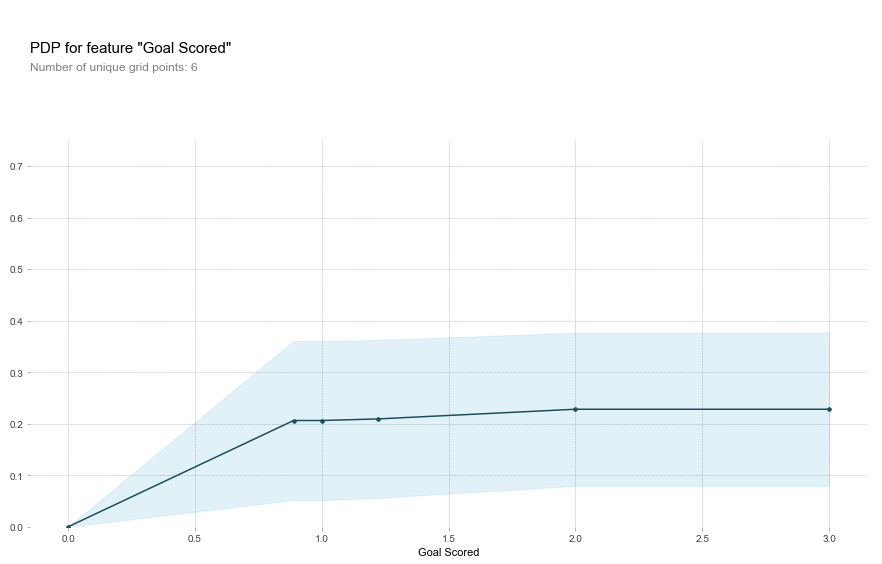

In [4]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

Scoring a goal substantially increases your chances of winning "Player of The Game."  But extra goals beyond that appear to have little impact on predictions.

Here is another example plot:

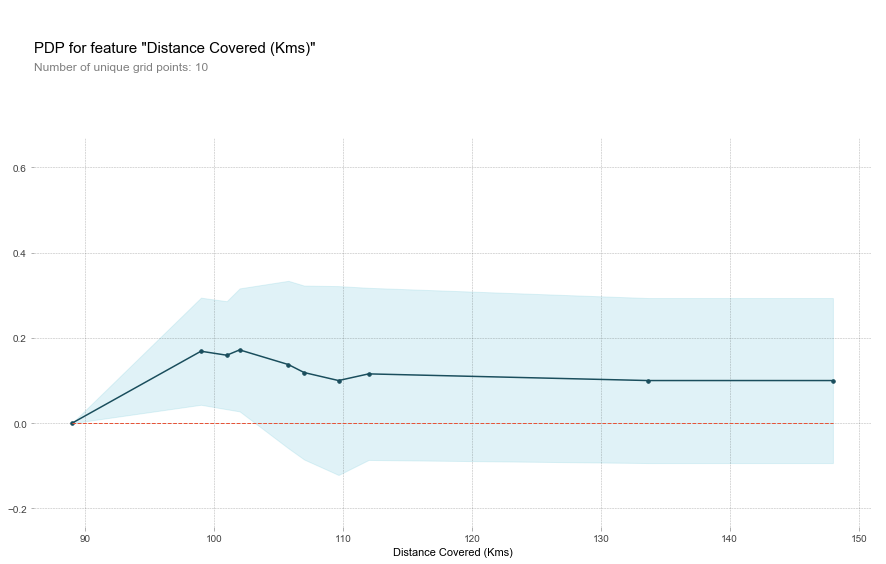

In [6]:
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature='Distance Covered (Kms)')

pdp.pdp_plot(pdp_dist, 'Distance Covered (Kms)')
plt.show()

This model thinks you are more likely to win *Player of The Game* if your players run a total of 100km over the course of the game. Though your prospects are hurt slightly if you run too much beyond that.  Fans of the game may be able to come up with interesting theories about this result.  Though the large blue area also says we should be somewhat unconfident in this result, which is unsurprising given the small dataset.

# 2D Partial Dependence Plots
If you are curious about interactions between features, 2D partial dependence plots are also useful. An example may clarify what this.


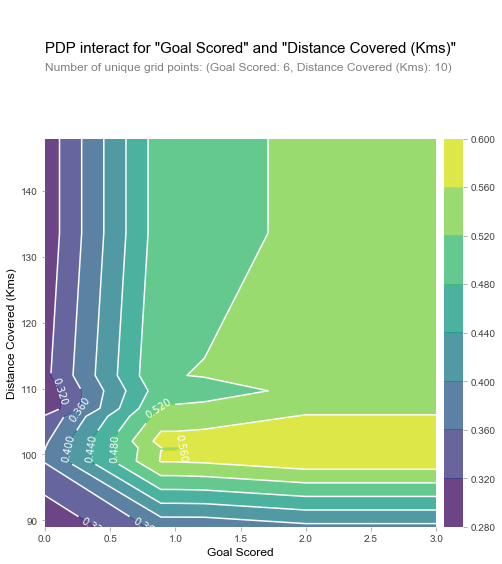

In [8]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
inter1  =  pdp.pdp_interact(model=my_model, dataset=val_X, model_features=feature_names, features=['Goal Scored', 'Distance Covered (Kms)'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Goal Scored', 'Distance Covered (Kms)'], plot_type='contour')
plt.show()

This graph shows predictions for any combination of Goals Scored and Distance covered. 

For example, we see the highest predictions when a team scores at least 1 goal and they run a total distance close to 100km.  If they score 0 goals, distance covered seems not to matter much. Distance has the biggest impact on predictions if they score exactly 1 goal. Can you see this pattern in the plot?

# Interpreting Causation vs Correlation

STILL NEED TO WRITE THIS

# Your Turn
It's your turn create and interpret some partial dependence plots. 

---
**[Course Home Page](https://www.kaggle.com/learn/ml-insights)**